In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

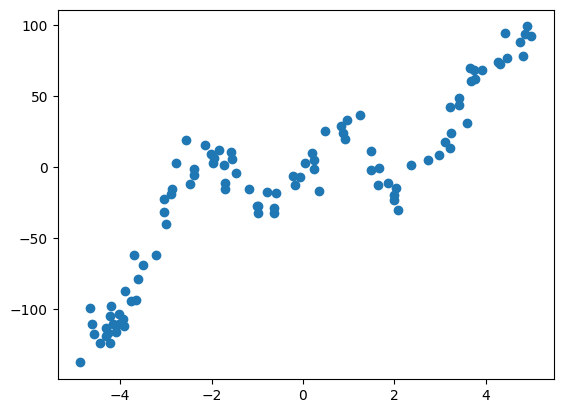

In [2]:
nObs = 100 # number of observations

# get noise around y observations
yNormal = torch.distributions.Normal(loc=0.0, scale=10)
yNoise  = yNormal.sample([nObs])

# get observations
X = 10*torch.rand([nObs])-5    # uniform from [-5,5]
y = X**3 - X**2 + 25 * torch.sin(2*X) + yNoise

plt.scatter(X, y)

In [3]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.l1 = nn.Linear(1, 1)
        self.l2 = nn.Linear(1, 1)
        self.l3 = nn.Linear(1, 1)
        self.l4 = nn.Linear(1, 1)
        
        self.relu = nn.ReLU()
        
    def forward(self, x):
        out = self.relu(self.l1(x))
        out = self.relu(self.l2(out))
        out = self.relu(self.l3(out))
        out = self.relu(self.l4(out))
        return out
    
m = LinearRegression()

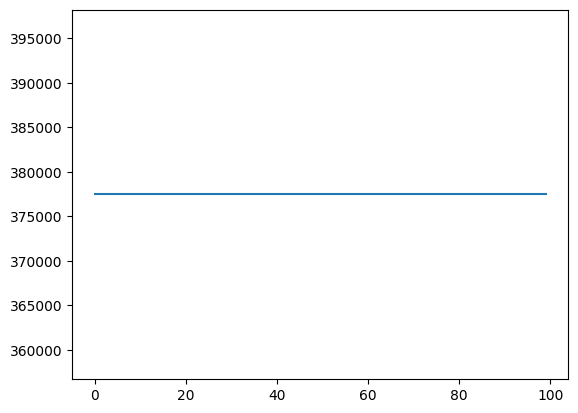

In [4]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(m.parameters(), lr=1e-4)

def train_model():
    losses = []
    
    m.train()
    for epoch in range(100):
        total_loss = 0
        for i in range(len(X)):
            target = X[i]
            label = y[i]
            
            pred = m(torch.tensor([target]))
            loss = loss_fn(pred, torch.tensor([label]))
            
            total_loss += float(loss)
            
            loss.backward()
            
        losses.append(total_loss)
        optimizer.step()
        optimizer.zero_grad()
    
    plt.plot(losses)
        
train_model()

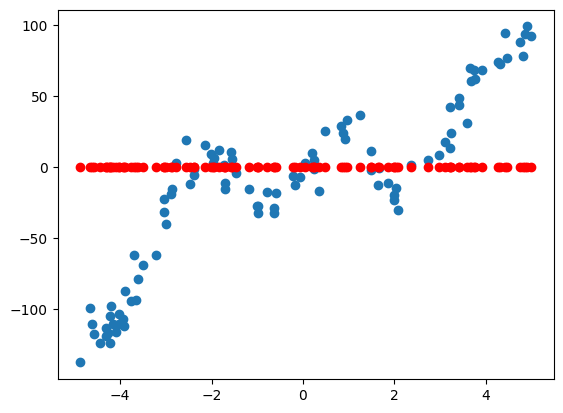

In [5]:
plt.scatter(X, y)
with torch.no_grad():
    preds = np.array([])
    for i in range(len(X)):
        target = X[i]
        pred = m(torch.tensor([target]))
        
        preds = np.append(preds, pred.detach())
        
    plt.scatter(X, preds, color='r')